In [2]:
# approach is from this website: 
# https://www.pluralsight.com/guides/explore-python-libraries:-imbalanced-learn
# BalancedRandomForestClassifier differs from SMOTE and ADASYN in that it is 
# not a resampling method, but rather a classifier in which the training employs 
# resampling internally. For more info, see Breinman et al., 
# Using Random Forest to Learn Imbalanced Data.

In [3]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# os.getcwd()

In [5]:
# os.listdir(os.getcwd())

In [6]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\steam_all_param_binary_tags_merged_nan_removed.csv")
all_param_df.shape


(31686, 357)

In [7]:
# using binary classification for logistic regression
y_class = all_param_df['suc_class']

In [8]:
y_class

0        1
1        0
2        0
3        0
4        0
        ..
31681    0
31682    0
31683    0
31684    0
31685    0
Name: suc_class, Length: 31686, dtype: int64

In [9]:
# create new X parameters df
x_data = all_param_df.drop(['appid','maxccu','success_class','suc_class','followers','positive_y', 'negative_y', 'totaltags', 'recommendations', 'positive_x', 'negative_x']  , axis=1)

In [10]:
x_data.shape

(31686, 346)

In [11]:
#label encode the developer name

In [12]:
x_data['developer']=x_data['developer'].astype('category')

In [13]:
x_data['developer']=x_data['developer'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,88,18255,Valve,999,90,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,18255,Valve,499,90,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,18255,Valve,499,90,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,18255,Valve,499,90,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6704,Valve,499,90,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#label encode the publisher name

In [15]:
x_data['publisher']=x_data['publisher'].astype('category')

In [16]:
x_data['publisher']=x_data['publisher'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,88,18255,15348,999,90,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,18255,15348,499,90,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,18255,15348,499,90,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,18255,15348,499,90,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6704,15348,499,90,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Instantiate the classifier

from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=200, random_state=0)

In [18]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, test_size=0.2, random_state=5)

In [19]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler().fit(X_train)

In [21]:
# apply the trained scales (MinMax) to the training and testing data

X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

In [22]:
# Instantiate and Train model
y = y_train
X = X_train_scaled

brf.fit(X, y)
y_pred = brf.predict(X_test_scaled)

In [23]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {brf.score(X, y)}")
print(f"Testing Data Score: {brf.score(X_test_scaled, y_test)}")

Training Data Score: 0.8724554205459997
Testing Data Score: 0.8710949826443674


In [24]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = brf.predict(X_test_scaled)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      6154
           1       0.16      0.82      0.27       184

    accuracy                           0.87      6338
   macro avg       0.58      0.85      0.60      6338
weighted avg       0.97      0.87      0.91      6338



In [25]:
# thinking about baseline results:
# Support is not balanced - ~7700 of 1's and  160 0's
# Percision: for no success: 100%, better for successful games: 20%
# Percision= % of labeling an outcome that is correct from all the labels of that outcome
# labeled cancer correctly from all labeled cancer
# Recall: Fraction of positives found, 92% for 0, 92% for 1
# Recall - % of true label found from all true cases of the label
# how many of the cancer cases did you find
# f1 score: 92% due to overfitting on failure cases

<AxesSubplot:>

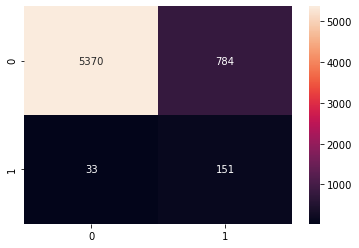

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = brf.predict(X_test_scaled)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [27]:
# Random Forests calculate feature importance
importances = brf.feature_importances_
# importances

In [29]:
# evaluate feature importance from X parameters
features_df = pd.DataFrame(zip(x_data.columns, brf.feature_importances_))
# sort by feature importance 
features_df = features_df.sort_values(by=[1], ascending=False)
# features_df



In [30]:
# drop all variables less than 0.02 feature importance
# x_filtered_df = features_df[features_df[1]>=0.01]
pd.set_option('display.max_rows', 346)
# x_filtered_df
features_df

,0,1
3,maxprice,8.255606e-02
0,metascore,5.646170e-02
108,tagmultiplayer,5.317862e-02
2,publisher,4.171218e-02
1,developer,4.016020e-02
4,maxdiscount,3.807897e-02
62,tagopenworld,3.772326e-02
57,tagcoop,3.419187e-02
141,tagsingleplayer,2.629277e-02
6,tagaction,1.492620e-02


In [29]:
# Apply Area Under ROC Curve scoring model (AUROC)
from sklearn.metrics import roc_auc_score

# Predict class probabilities
prob_y_2 = brf.predict_proba(X_test)
prob_y_2

array([[0.525, 0.475],
       [0.66 , 0.34 ],
       [0.305, 0.695],
       ...,
       [0.455, 0.545],
       [0.525, 0.475],
       [0.545, 0.455]])

In [30]:
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]

In [31]:
# Print AUROC of SMOTE model
# ROC is a probability curve and AUC represents the degree or measure of separability. 
# It tells how much the model is capable of distinguishing between classes. 
# Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.
print( roc_auc_score(y_test, prob_y_2) )

0.8853021541309293


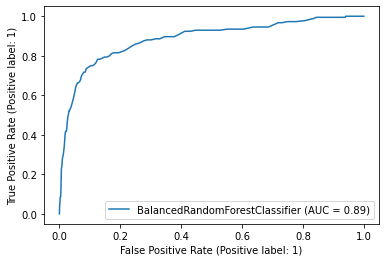

In [32]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(brf, X_test, y_test)  
plt.show()